In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
amazon = pd.read_csv('./amazon_cells_labelled.txt', sep='\t', header=None)
imdb = pd.read_csv('./imdb_labelled.txt', sep='\t', header=None)
yelp = pd.read_csv('./yelp_labelled.txt', sep='\t', header=None)

# Wstępna analiza

In [3]:
amazon

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [7]:
imdb

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [5]:
yelp

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [12]:
print(np.count_nonzero(amazon[1])/amazon.shape[0])
print(np.count_nonzero(imdb[1])/imdb.shape[0])
print(np.count_nonzero(yelp[1])/yelp.shape[0])

0.5
0.516042780748663
0.5


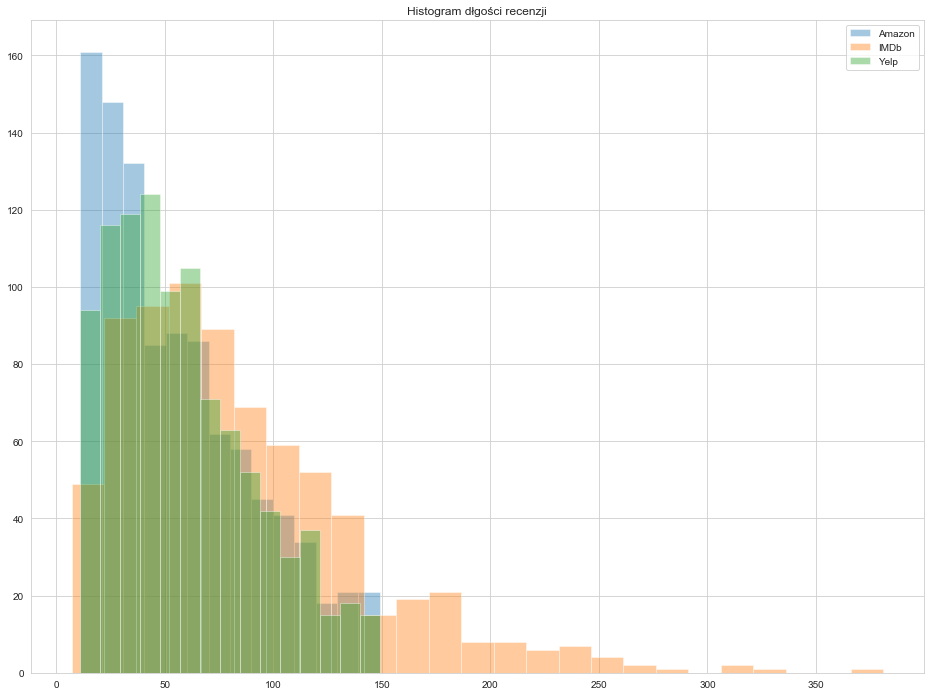

In [78]:
plt.figure(figsize=(16,12))

sns.set_style("whitegrid")
am_lens = list(map(len, amazon[0]))
sns.distplot(am_lens, kde=False)

im_lens = [ i for i in list(map(len, imdb.drop(index=136, axis=0)[0])) if i < 400]
#plt.xlim([0, 500])
sns.distplot(im_lens, kde=False)

ye_lens = list(map(len, yelp[0]))
sns.distplot(ye_lens, kde=False)


plt.title("Histogram dłgości recenzji")
plt.legend(["Amazon", "IMDb", "Yelp"])

In [81]:
np.mean(am_lens)

55.226

In [84]:
np.mean(list(map(len, imdb.drop(index=136, axis=0)[0])))

100.50066934404283

In [83]:
np.mean(ye_lens)

58.316

In [85]:
[ i for i in list(map(len, imdb.drop(index=136, axis=0)[0])) if i > 400]

[4778, 1053, 1562, 479, 4487]

# NLP

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [109]:
count_vect_a = CountVectorizer()
a_vec = count_vect.fit_transform(amazon[0])
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(a_vec, amazon[1])

a_svm = MultinomialNB()
a_svm.fit(X_train_a, y_train_a)
a_svm.score(X_test_a, y_test_a)

0.844

In [116]:
count_vect_i = CountVectorizer()
i_vec = count_vect.fit_transform(imdb[0])
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(i_vec, imdb[1])

i_svm = MultinomialNB()
i_svm.fit(X_train_i, y_train_i)
i_svm.score(X_test_i, y_test_i)

0.7540106951871658

In [120]:
count_vect_y = CountVectorizer()
y_vec = count_vect.fit_transform(yelp[0])
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(y_vec, yelp[1])

y_svm = MultinomialNB()
y_svm.fit(X_train_y, y_train_y)
y_svm.score(X_test_y, y_test_y)

0.816

In [125]:
joined_reviews = np.concatenate((amazon[0], imdb[0], yelp[0]))
#joined_labels = np.concatenate((amazon[1], imdb[1], yelp[1]))

count_vect_f = CountVectorizer()
full_corpus = count_vect_f.fit(joined_reviews)

In [128]:
af_vec = count_vect_f.transform(amazon[0])
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(af_vec, amazon[1])

if_vec = count_vect_f.transform(imdb[0])
X_train_if, X_test_if, y_train_if, y_test_if = train_test_split(if_vec, imdb[1])

yf_vec = count_vect_f.transform(yelp[0])
X_train_yf, X_test_yf, y_train_yf, y_test_yf = train_test_split(yf_vec, yelp[1])

af_svm = MultinomialNB()
af_svm.fit(X_train_af, y_train_af)

yf_svm = MultinomialNB()
yf_svm.fit(X_train_yf, y_train_yf)

if_svm = MultinomialNB()
if_svm.fit(X_train_if, y_train_if)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [135]:
print(af_svm.score(X_test_af, y_test_af))
print(af_svm.score(X_test_if, y_test_if))
print(af_svm.score(X_test_yf, y_test_yf))

0.804
0.6417112299465241
0.728


In [136]:
print(if_svm.score(X_test_af, y_test_af))
print(if_svm.score(X_test_if, y_test_if))
print(if_svm.score(X_test_yf, y_test_yf))

0.688
0.7112299465240641
0.64


In [137]:
print(yf_svm.score(X_test_af, y_test_af))
print(yf_svm.score(X_test_if, y_test_if))
print(yf_svm.score(X_test_yf, y_test_yf))

0.724
0.7219251336898396
0.816


In [94]:
af_vec = count_vect.transform(amazon[0])
X_train_af, X_test_af, y_train_a, y_test_a = train_test_split(a_vec, amazon[1])

a_svm = MultinomialNB()
a_svm.fit(X_train_a, y_train_a)
a_svm.score(X_test_a, y_test_a)

In [95]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(am_vec, joined_labels)

In [96]:
clf = MultinomialNB().fit(X_train_a, y_train_a)

In [97]:
#docs_new = ['Slow service, will not use again', 'Could not recommend enough', 'Will recommend', 'Will not recommend', 'Good', 'Great']
#X_new = count_vect.transform(X_test_a)
#X_new_tfidf = tfidf_transformer.transform(X_new_counts)

#predicted = clf.predict(X_new_tfidf)
predicted = clf.predict(X_test_a)
print(accuracy_score(y_test_a, predicted))
#sklearn.metrics.ac
#for doc, category in zip(docs_new, predicted):
#    print('%r => %s' % (doc, twenty_train.target_names[category]))

#'God is love' => soc.religion.christian
#'OpenGL on the GPU is fast' => comp.graphics

0.8180494905385735


In [98]:
recenzja = ['Fast delivery', 'Good', 'Bad']
transformed = count_vect.transform(recenzja)
prediction = clf.predict(transformed)
prediction

array([1, 1, 0])